In [1]:
%reset -f
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Transformada de Fourier

Nesta aula vamos estudar uma ferramenta matemática poderosa chamada "Transformada de Fourier". Para entender porque a transformada de Fourier é valiosa, considere o seguinte problema. Vamos retornar à imagem do veiculo em movimento:

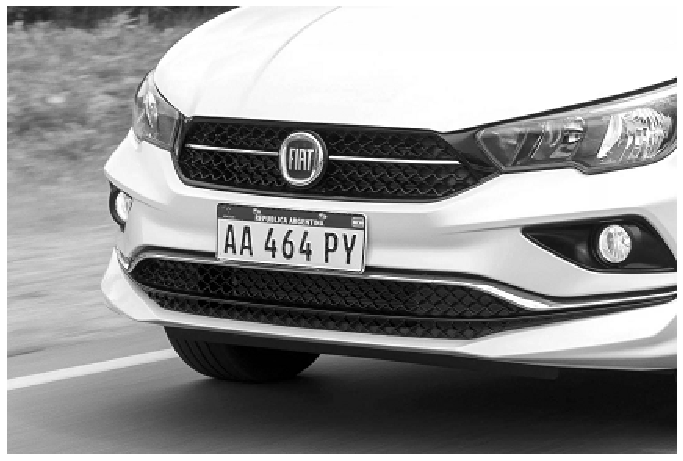

In [2]:
img = cv2.cvtColor(cv2.imread('carro.png'), cv2.COLOR_BGR2GRAY) / 255.0
rows, cols = img.shape

plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


Podemos modelar o efeito de "motion blur" que acontece ao tirarmos uma foto do carro em movimento através de uma convolução. Vamos simular o "motion blur" para um movimento de deslocamento para a esquerda de 15 pixels durante o período de abertura do obturador da câmera:

In [3]:
kernel = np.zeros((31, 31))
kernel[15, 15:] = 1
kernel = kernel / kernel.sum()

plt.figure(figsize=(6,6))
plt.imshow(kernel, cmap='gray')
plt.show()

Atenção: estritamente falando, o kernel acima representa um deslocamento para a direita! Vamos usar o kernel deste jeito porque vamos usar a função filter2D do OpenCV, que não faz flipa-flipa!

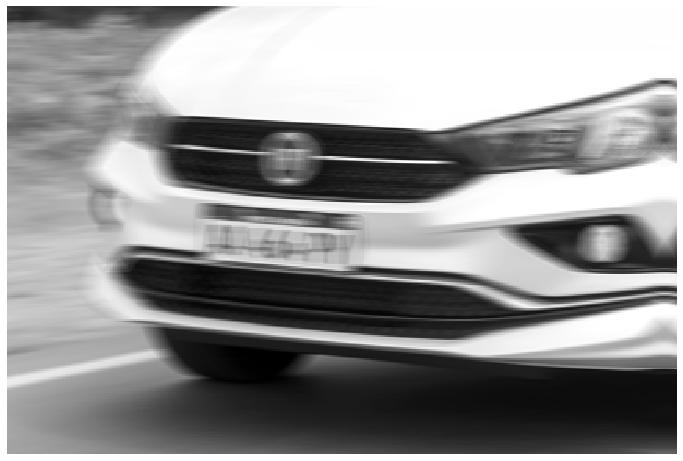

In [4]:
img_blur = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(12,12))
plt.imshow(img_blur, cmap='gray')
plt.axis('off')
plt.show()

Ok, até aqui nada de novo. Agora vem o desafio: se eu te desse apenas a imagem borrada, como descobrir a imagem original? Mesmo que eu conhecesse o kernel com alta precisão, e que a imagem borrada viesse sem ruído, ainda assim não sabemos como reverter esse filtro!

Para isso vamos conhecer a transformada de Fourier. Mais precisamente, vamos conhecer um pouco sobre duas variantes específicas da transformada de Fourier:

- Transformada de Fourier de Tempo Discreto (*Discrete-Time Fourier Transform*)
- Transformada Discreta de Fourier (*Discrete Fourier Transform*)

## Autovetores e autovalores de uma transformação linear

Vimos nas aulas anteriores que um filtro linear e invariante ao deslocamento é caracterizado pela convolução do sinal de entrada com a resposta ao impulso unitário do filtro:

$$
y[n] = \sum_{k = -\infty}^{+\infty} x[k] h[n-k]
$$

<center><img src="filtro.png"/></center>

Equivalentemente:

$$
y[n] = \sum_{k = -\infty}^{+\infty} h[k] x[n-k]
$$

Esta expressão matemática vale para sinais reais ou complexos: nada impede que façamos $x[n] \in \mathbb{C}$ ou $h[n] \in \mathbb{C}$.

Façamos um experimento: o que acontece quando o sinal de entrada é uma senoide complexa?

$$
x[n] = e^{j \omega n} = \cos(\omega n) + j \sin(\omega n)
$$

Temos:

$$
y[n] = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] = \sum_{k = -\infty}^{+\infty} h[k] e^{j \omega (n - k)}
$$

Separando a exponencial e reagrupando termos:

$$
y[n] = \sum_{k = -\infty}^{+\infty} h[k] e^{j \omega (n - k)} = \sum_{k = -\infty}^{+\infty} h[k] e^{-j \omega k} e^{j \omega n}
$$

O termo $e^{j \omega n}$ não depende de $k$ e pode ser colocado em evidência:

$$
y[n] = \left(\underbrace{\sum_{k = -\infty}^{+\infty} h[k] e^{-j \omega k}}_{H(\omega)}\right) \underbrace{e^{j \omega n}}_{x[n]} = H(\omega) x[n]
$$

Ou seja, quando a entrada é uma senoide complexa, a saída é a mesma senoide complexa só que multiplicada por um número complexo. Este número complexo $H(\omega)$ depende da frequência angular $\omega$ do sinal de entrada.

Quando um sistema linear é submetido a uma entrada $x[n]$ e resulta em uma saida que é um multiplo da entrada, dizemos que $x[n]$ é um *autovetor* deste sistema linear, e o multiplo correspondente é chamado de *autovalor*. Neste nosso exemplo provamos que $\exp(j \omega n)$ é um autovetor para qualquer sistema linear e invariante ao deslocamento, com $H(\omega)$ o seu autovalor.

## Transformada de Fourier de Tempo Discreto

Inspirados pela derivação acima, vamos definir a Transformada de Fourier de Tempo Discreto (TFTD) de um sinal qualquer $x[n]$ como:

$$
X(\omega) = \mathcal{F}\left\{ x[n] \right\} = \sum_{n = -\infty}^{+\infty} x[n] e^{-j \omega n}
$$

A única restrição aqui é que $\sum_{n = -\infty}^{+\infty} (x[n])^2 < +\infty$, senão a soma não converge.

A TFTD inversa é dada pela expressão:

$$
x[n] = \mathcal{F}^{-1} \left\{ X(\omega) \right\} = \frac{1}{2 \pi} \int_{0}^{2 \pi} X(\omega) e^{j \omega n} d \omega
$$

Para verificar que a expressão acima é o inverso da TFTD, basta substituir uma na outra! Fica como exercício.

**Atividade:** Calcule a transformada de Fourier dos seguintes sinais:

1. $\delta[n]$

2. $\delta[n - n_0]$ para qualquer $n_0 \in \mathbb{Z}$

3. $h[n] = [(1), 1, 1]$

4. $h[n] = [1, (0), -1]$

**R:**

A TFTD tem várias propriedades:

<table>
    <tr>
        <th>
            Propriedade
        </th>
        <th>
            tempo
        </th>
        <th>
            frequencia
        </th>
    </tr>
    <tr>
        <td>
            Definição
        </td>
        <td>
            $$
            x[n] = \frac{1}{2 \pi} \int_{0}^{2 \pi} X(\omega) e^{j \omega n} d \omega
            $$
        </td>
        <td>
            $$
            X(\omega) = \sum_{n = -\infty}^{+\infty} x[n] e^{-j \omega n}
            $$
        </td>
    </tr>
    <tr>
        <td>
            Linearidade
        </td>
        <td>
            $$
            x_3[n] = A x_1[n] + B x_2[n]
            $$
        </td>
        <td>
            $$
            X_3(\omega) = A X_1(\omega) + B X_2(\omega)
            $$
        </td>
    </tr>
    <tr>
        <td>
            Deslocamento
        </td>
        <td>
            $$y[n] = x[n - n_0]$$
        </td>
        <td>
            $$Y(\omega) = X(\omega) e^{-j \omega n_0}$$
        </td>
    </tr>
    <tr>
        <td>
            Modulação
        </td>
        <td>
            $$y[n] = x[n] e^{j \omega_0 n}$$
        </td>
        <td>
            $$Y(\omega) = X(\omega - \omega_0)$$
        </td>
    </tr>
    <tr>
        <td>
            Periodicidade
        </td>
        <td>
            $x[n]$ qualquer
        </td>
        <td>
            $$X(\omega + k 2 \pi) = X(\omega)$$
        </td>
    </tr>
    <tr>
        <td>
            Decimação
        </td>
        <td>
            $$y[n] = x[n M]$$
        </td>
        <td>
            $$Y(\omega) = \frac{1}{M} \sum_{m = 0}^{M - 1} X(\frac{\omega - 2 \pi m}{M})$$
        </td>
    </tr>
    <tr>
        <td>
            Expansão
        </td>
        <td>
            $$y[n] = \left\{
            \begin{align}
            & 0, & n \mod M \neq 0 \\
            & x[n/M], & n \mod M = 0
            \end{align}\right.$$
        </td>
        <td>
            $$Y(\omega) = X(M \omega)^{*}$$
        </td>
    </tr>
    <tr>
        <td>
            sinal real
        </td>
        <td>
            $$x[n] \in \mathbb{R}$$
        </td>
        <td>
            $$X(\omega) = X(-\omega)^{*}$$
        </td>
    </tr>
    <tr>
        <td>
            sinal simétrico
        </td>
        <td>
            $$x[n] = x[-n]$$
        </td>
        <td>
            $$X(\omega) \in \mathbb{R}$$
        </td>
    </tr>
</table>

E agora, a propriedade mais importante de todas:

<table>
<tr>
    <th>
        Propriedade
    </th>
    <th>
        tempo
    </th>
    <th>
        frequencia
    </th>
</tr>
<tr>
    <td>
        Convolução
    </td>
    <td>
        $$
        y[n] = x_1[n] * x_2[n]
        $$
    </td>
    <td>
        $$
        Y(\omega) = X_1(\omega) X_2(\omega)
        $$
    </td>
</tr>
</table>

Ahá! Com essa propriedade podemos tentar resolver o problema da filtragem inversa!

Só tem um problema: $H(\omega)$ é uma função contínua, e o computador só lida com valores discretos... Como resolver?

## Transformada Discreta de Fourier

Vimos nas propriedades acima que a transformada de Fourier de tempo discreto resulta em uma função periódica continua.  Surpreendentemente... o contrário também é verdade! 

Estou querendo dizer que a transformada de um sinal periódico é um sinal discreto, mas o que isso significa? Afinal, é proibido aplicar a TFTD em um sinal periódico, pois isso viola a condição $\sum_{n = -\infty}^{+\infty} (x[n])^2 < +\infty$!

Para conseguir extrair a transformada de Fourier de um sinal periódico temos que usar um truque: a transformada do "trem de impulsos" (em inglês, "Dirac comb"): 

<table>
<tr>
    <th>
        Propriedade
    </th>
    <th>
        tempo
    </th>
    <th>
        frequencia
    </th>
</tr>
<tr>
    <td>
        Trem de impulsos
    </td>
    <td>
        $$
        x[n] = \sum_{k = -\infty}^{+\infty} \delta(n - k M)
        $$
    </td>
    <td>
        $$
        Y(\omega) = \frac{2 \pi}{M} 
        \sum_{m = -\infty}^{+\infty} \delta \left(\omega - k \frac{2 \pi}{M}\right)
        $$
    </td>
</tr>
</table>

A função $\delta(\omega)$ é o "delta de Dirac" que vocês conhecem de "Modelagem e Controle"

Agora podemos obter a transformada de um sinal periódico de período $N$. Basta imaginar que um sinal periódico é obtido tomando um dos períodos do sinal e repetindo este sinal várias vezes. A repetição pode ser obtida com a convolução com o trem de impulsos!

$$
x[n] = x_{\text{per}}[n] * \sum_{k = -\infty}^{+\infty} \delta(n - k N)
$$

No dominio da frequencia temos:

$$
X(\omega) = X_{\text{per}}(\omega) 
\left( 
\frac{2 \pi}{N} 
\sum_{k = -\infty}^{+\infty} \delta \left(\omega -  k \frac{2 \pi}{N}\right)
\right)
$$

Note que o sinal na frequência é feito de uma sequência periódica de deltas de Dirac. No computador precisamos apenas guardar as amplitudes desses pulsos, nas frequências $k 2 \pi / N$:

$$
X[k] = \sum_{n = 0}^{N - 1} x[n] e^{-j 2 \pi \frac{k n}{N}}
$$

Esta é a transformada discreta de Fourier. A transformada inversa é dada por:

$$
x[n] = \frac{1}{N} \sum_{k = 0}^{N - 1} X[k] e^{j 2 \pi \frac{k n}{N}}
$$

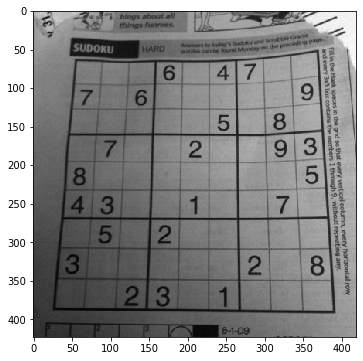

In [36]:
img = cv2.cvtColor(cv2.imread('sudoku-original.jpg'), cv2.COLOR_BGR2GRAY) / 255.0
rows, cols = img.shape

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray');

In [37]:
img_freq = np.fft.fft2(img)

In [38]:
img_freq.dtype

dtype('complex128')

In [39]:
img_mag = np.abs(img_freq)
img_angle = np.angle(img_freq)

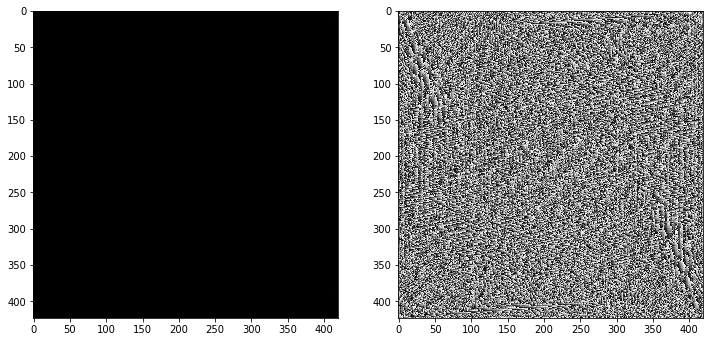

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_mag, cmap='gray')
plt.subplot(122)
plt.imshow(img_angle, cmap='gray');

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.log(img_mag + 1), cmap='gray')
plt.subplot(122)
plt.imshow(np.unwrap(img_angle), cmap='gray');

### fftshift

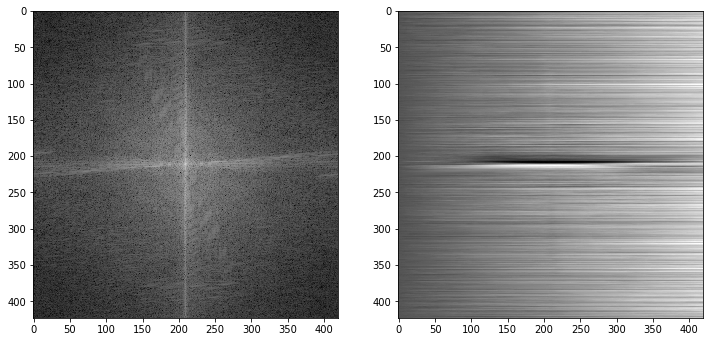

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.log(np.fft.fftshift(img_mag) + 0.1), cmap='gray')
plt.subplot(122)
plt.imshow(np.unwrap(np.fft.fftshift(img_angle)), cmap='gray');

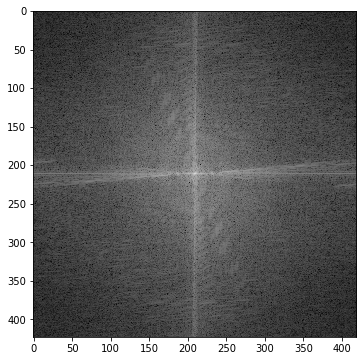

In [43]:
def show_complex(img_freq):
    img_mag = np.abs(img_freq)
    plt.figure(figsize=(6, 6))
    plt.imshow(np.log(np.fft.fftshift(img_mag) + 0.1), cmap='gray')
    
show_complex(img_freq)

**Atividade:** Construa uma imagem de teste contendo um segmento de reta horizontal fininho (espessura 1 pixel) e branco (valor 1.0) no meio de uma região escura (valor 0.0). Calcule e mostre a magnitude da transformada de Fourier dele.

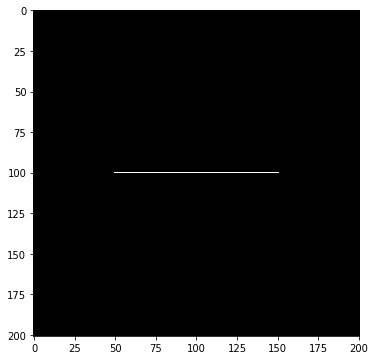

In [44]:
img_teste_fininho = np.zeros((201, 201))
img_teste_fininho[100, 50:151] = 1.0
plt.figure(figsize=(6,6))
plt.imshow(img_teste_fininho, cmap='gray');

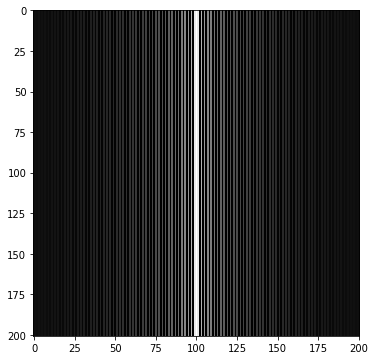

In [45]:
img_teste_fininho_freq = np.fft.fft2(img_teste_fininho)
show_complex(img_teste_fininho_freq)

**Atividade:** Construa outra imagem de teste com um segmento de reta mais espesso (espessura 3 pixels) e repita o item anterior

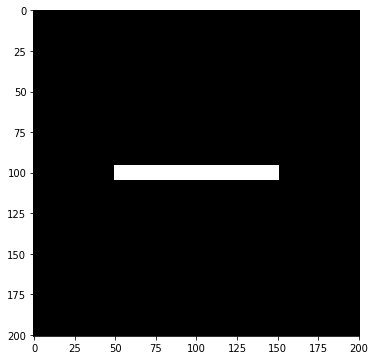

In [46]:
img_teste_espesso = np.zeros((201, 201))
img_teste_espesso[96:105, 50:151] = 1.0
plt.figure(figsize=(6,6))
plt.imshow(img_teste_espesso, cmap='gray');

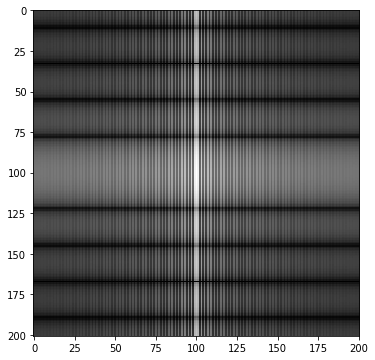

In [47]:
img_teste_espesso_freq = np.fft.fft2(img_teste_espesso)
show_complex(img_teste_espesso_freq)

**Atividade:** Rotacione esta ultima imagem de teste em 30 graus. Calcule a magnitude da transformada de Fourier.

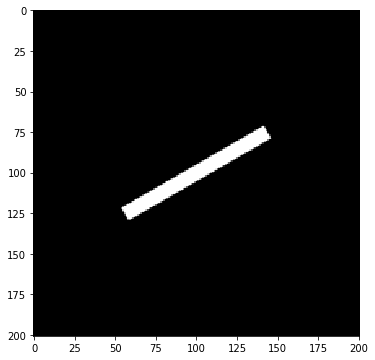

In [48]:
rows, cols = img_teste_espesso.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2), 30, 1)

img_teste_espesso_rot = cv2.warpAffine(img_teste_espesso, M, (cols,rows))
plt.figure(figsize=(6,6))
plt.imshow(img_teste_espesso_rot, cmap='gray');

**Atividade:** Some as duas imagens (a do traço espesso e a sua versão rotacionada). Calcule a transformada de Fourier e mostre sua magnitude.

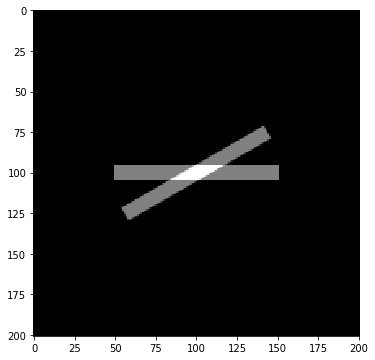

In [49]:
img_teste_soma = img_teste_espesso + img_teste_espesso_rot
plt.figure(figsize=(6,6))
plt.imshow(img_teste_soma, cmap='gray');

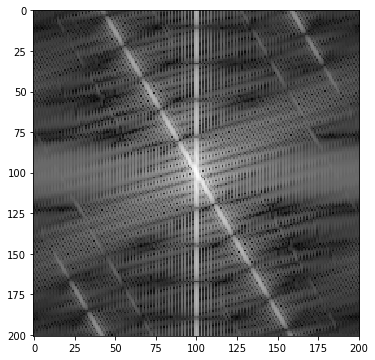

In [50]:
img_teste_soma_freq = np.fft.fft2(img_teste_soma)
show_complex(img_teste_soma_freq)

## Convolução e transformada de Fourier

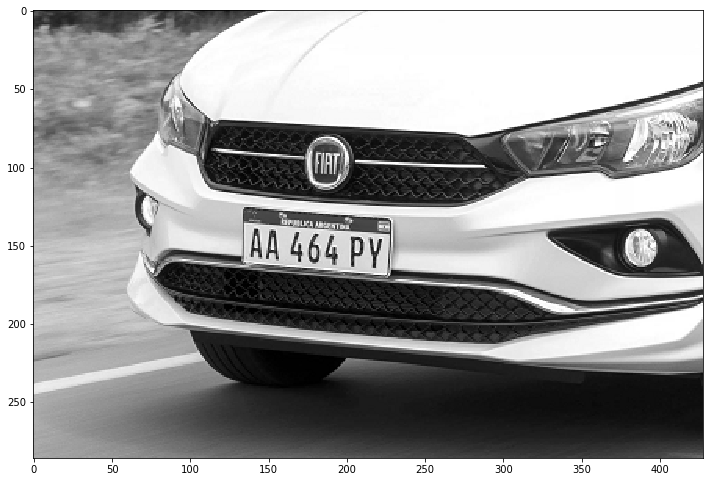

In [51]:
img = cv2.cvtColor(cv2.imread('carro.png'), cv2.COLOR_BGR2GRAY) / 255.0
plt.figure(figsize=(12, 12))
plt.imshow(img, cmap='gray');

In [52]:
kernel = (1/25)*np.ones((5,5))
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Como combinar o kernel com a imagem usando a transformada de Fourier? Bem, de acordo com a propriedade da convolução no espaço versus multiplicação na frequência, bastaria:

- Calcular a transformada da imagem original
- Calcular a transformada do kernel
- Multiplicar os dois resultados
- Calcular a transformada inversa

Moleza, não? Mas temos um problema:

- A imagem e o kernel não tem o mesmo tamanho
- A origem da imagem é o pixel (0, 0), já a origem do kernel é a posição central dele

Vamos resolver estes problemas:

1. Tamanho de imagem e kernel

Solução: zero padding:

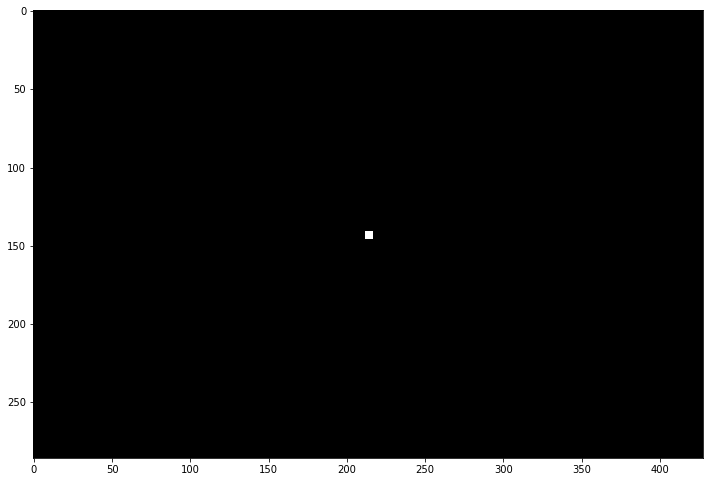

In [53]:
rows, cols = img.shape
rows_kernel, cols_kernel = kernel.shape

pad_size_rows = (rows - rows_kernel) // 2
pad_size_cols = (cols - cols_kernel) // 2

img_kernel = np.pad(kernel, 
                    [[pad_size_rows + 1, pad_size_rows], 
                     [pad_size_cols + 1, pad_size_cols]], 
                    'constant', constant_values=0)

plt.figure(figsize=(12, 12))
plt.imshow(img_kernel, cmap='gray');

2. Origem da imagem e do kernel

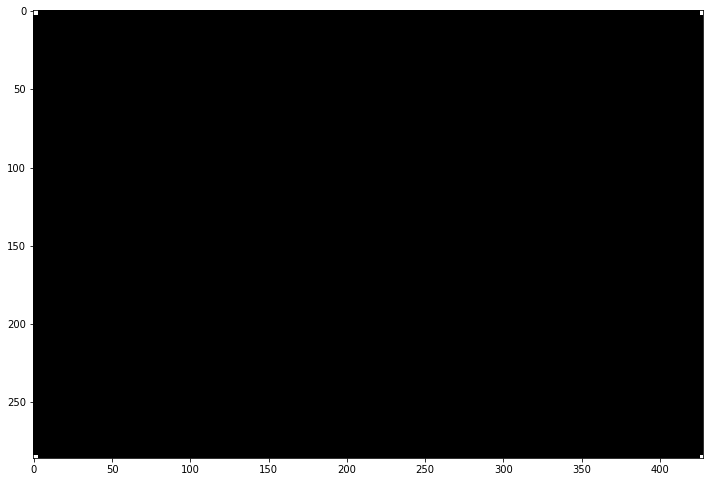

In [54]:
img_kernel = np.fft.fftshift(img_kernel)

plt.figure(figsize=(12, 12))
plt.imshow(img_kernel, cmap='gray');

Agora podemos trabalhar no domínio da frequencia:

In [55]:
img_freq = np.fft.fft2(img)
img_kernel_freq = np.fft.fft2(img_kernel)

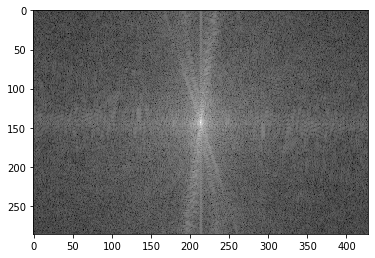

In [56]:
show_complex(img_freq)

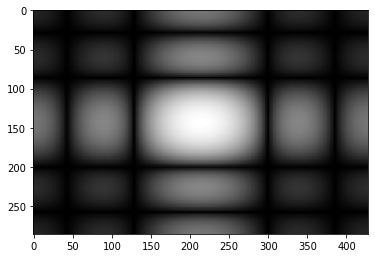

In [57]:
show_complex(img_kernel_freq)

In [58]:
img_filter_freq = img_kernel_freq * img_freq

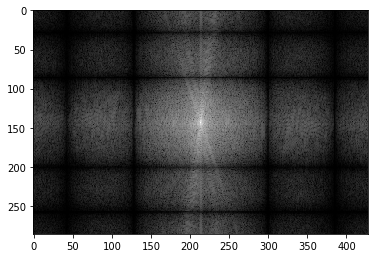

In [59]:
show_complex(img_filter_freq)

In [60]:
img_filter = np.fft.ifft2(img_filter_freq).real

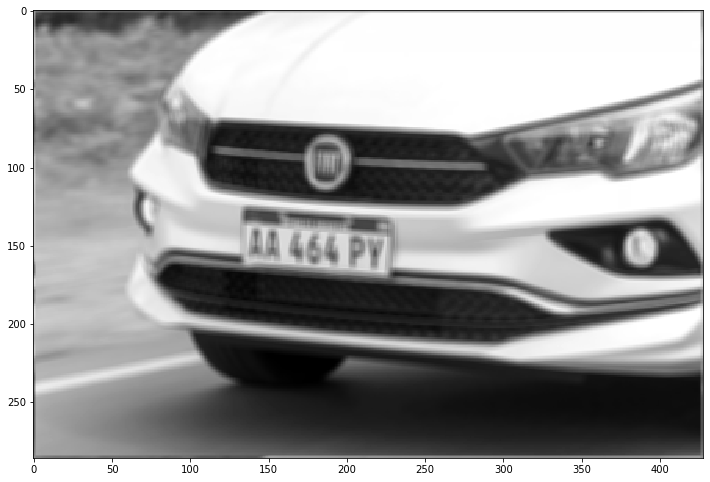

In [61]:
plt.figure(figsize=(12, 12))
plt.imshow(img_filter, cmap='gray');

In [62]:
def roda_experimento(img, kernel, clip=True):
    rows, cols = img.shape
    rows_kernel, cols_kernel = kernel.shape

    pad_size_rows = (rows - rows_kernel) // 2
    pad_size_cols = (cols - cols_kernel) // 2

    img_kernel = np.pad(kernel, 
                        [[pad_size_rows + 1, pad_size_rows], 
                         [pad_size_cols + 1, pad_size_cols]], 
                        'constant', constant_values=0)
    img_kernel = np.fft.fftshift(img_kernel)

    img_freq = np.fft.fft2(img)
    img_kernel_freq = np.fft.fft2(img_kernel)
    img_filter_freq = img_kernel_freq * img_freq
    img_filter = np.fft.ifft2(img_filter_freq).real

    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    show_complex(img_freq)
    show_complex(img_kernel_freq)
    show_complex(img_filter_freq)
    plt.figure(figsize=(6, 6))
    if clip:
        plt.imshow(np.clip(img_filter, 0, 1), cmap='gray')
    else:
        plt.imshow(img_filter, cmap='gray')

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


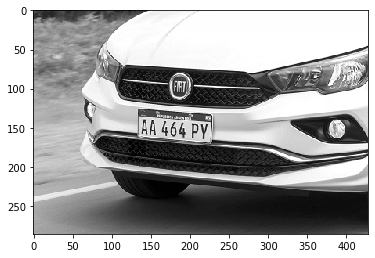

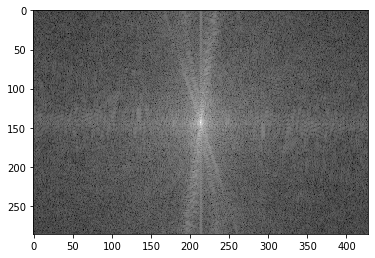

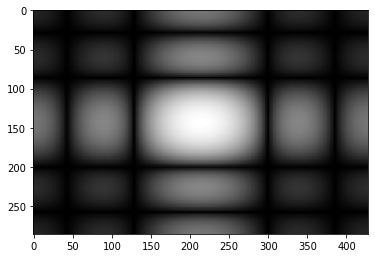

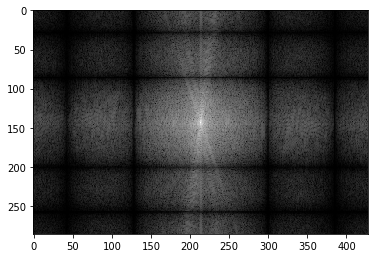

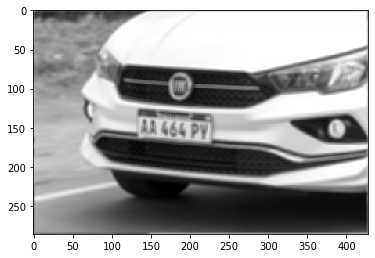

In [63]:
kernel = (1/25)*np.ones((5,5))
print(kernel)

roda_experimento(img, kernel)

**Atividade:** Agora rode o experimento com os kernels:

- motion blur

- laplaciano

- realce

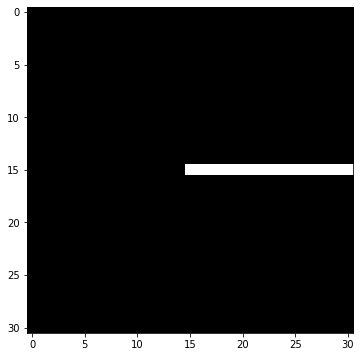

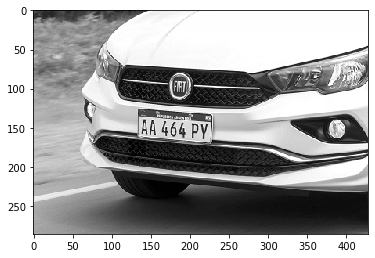

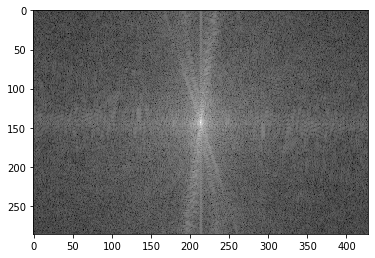

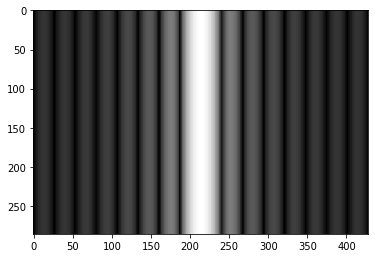

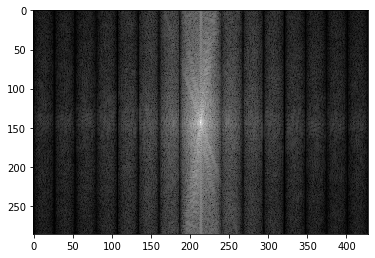

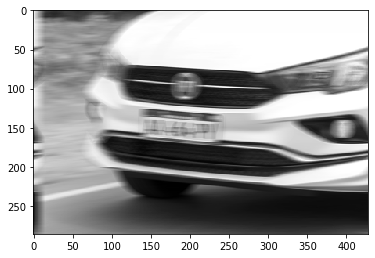

In [64]:
# motion blur
kernel = np.zeros((31, 31))
kernel[15, 15:] = 1
kernel = kernel / kernel.sum()
plt.figure(figsize=(6,6))
plt.imshow(kernel, cmap='gray')
roda_experimento(img, kernel)

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


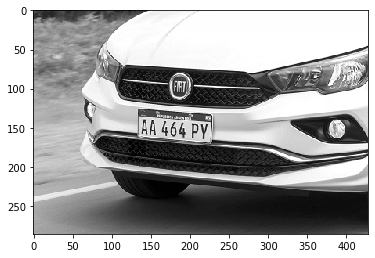

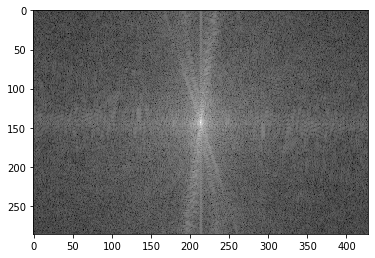

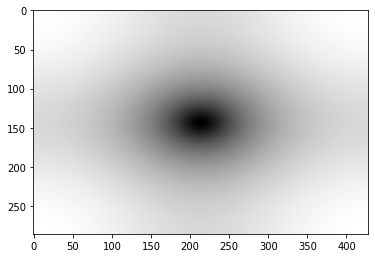

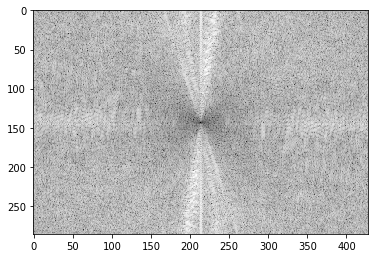

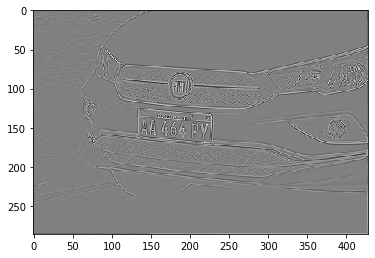

In [65]:
# Laplaciano
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float64)
print(kernel)
roda_experimento(img, kernel, clip=False)

[[ 0.  -0.8  0. ]
 [-0.8  4.2 -0.8]
 [ 0.  -0.8  0. ]]


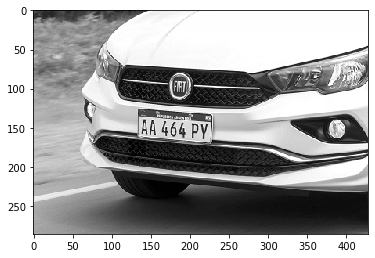

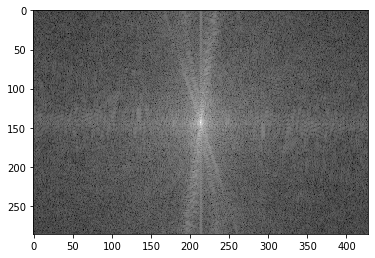

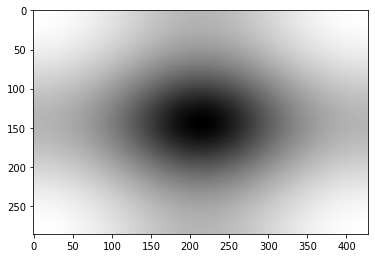

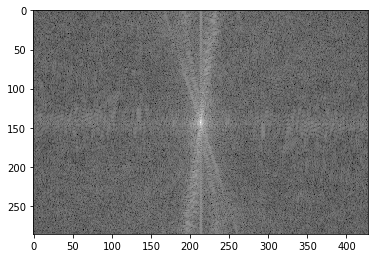

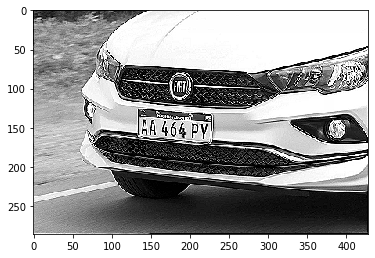

In [66]:
alpha = 0.8
kernel = np.array([[0, -alpha, 0], [-alpha, 1.0 + 4.0*alpha , -alpha], [0, -alpha, 0]])
print(kernel)
roda_experimento(img, kernel)